## Homework9
#### 李佳慜 10235501405

#### 机器学习基础操作线性模型

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# 1.读取数据
df = pd.read_csv('D:/save/bike.csv')

# 2.剔除id列
df = df.drop('id', axis=1)

# 3.筛选出上海市的所有数据，并剔除city列
df = df[df['city'] == 1].drop('city', axis=1)

# 4.简化hour列
df['hour'] = (df['hour'] >= 6) & (df['hour'] <= 18).astype(int)

# 5.提取y列，并转换为numpy列向量，然后剔除y列
y = df['y'].values.reshape(-1, 1)
df = df.drop('y', axis=1)

# 6.将DataFrame对象转换为Numpy数组
X = df.values

# 7.划分训练集与测试集（8:2）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8.归一化
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# 9.构建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 10.利用测试集进行预测
y_pred_scaled = model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_true = scaler_y.inverse_transform(y_test)

# 11.计算均方根误差（RMSE）
rmse = math.sqrt(mean_squared_error(y_test_true, y_pred))
print(f'RMSE: {rmse}')

RMSE: 31.568478635113294


#### 利用K近邻算法学习鸢尾花数据集

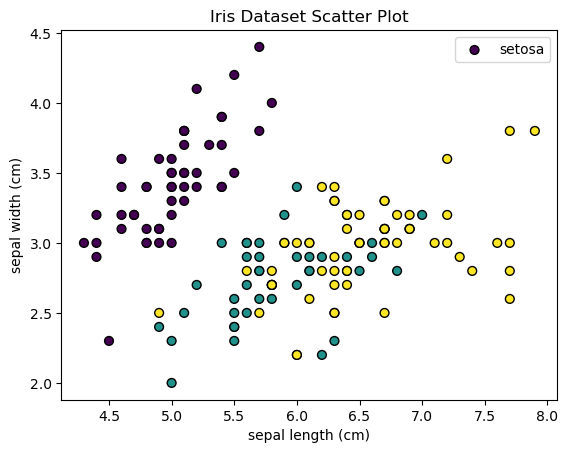

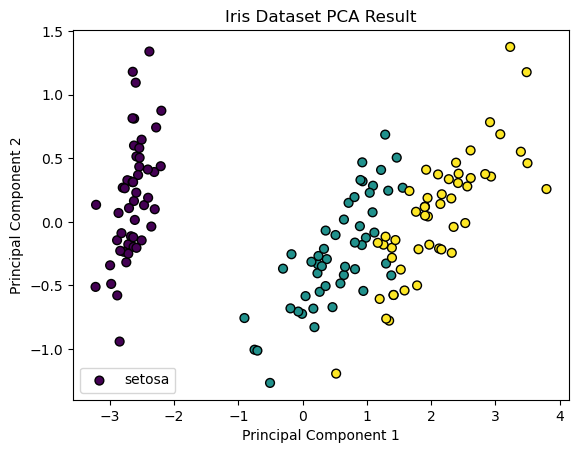

分类准确率为: 1.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset Scatter Plot')
plt.legend(target_names, loc='best')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset PCA Result')
plt.legend(target_names, loc='best')
plt.show()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'分类准确率为: {accuracy:.2f}')